In [15]:
# 1.重回帰分析の実装
# 2.線形関係の化学臭を抑制するための手法
# 3.相関関係と多重共線性問題

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ans

In [1]:
from sklearn.datasets import load_boston

In [2]:
dataset = load_boston()

/Users/nakagawaratakumi/Desktop/Orange Coast College '22/Computer Science/phython/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::

In [5]:
x = dataset.data #入力変数
t = dataset.target #target

columns = dataset.feature_names

In [7]:
type(x), x.shape

(numpy.ndarray, (506, 13))

In [10]:
type(t), t.shape
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [16]:
df = pd.DataFrame(x, columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
df['Target'] = t
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
# 入力ちと出力値の切り分け
t = df['Target'].values

In [25]:
x = df.drop(labels=['Target'],axis=1).values #delete the 'Target' row

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [28]:
len(x_train)

354

In [29]:
len(t_train)

354

In [30]:
len(x_test)

152

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model

LinearRegression()

In [34]:
model.fit(x_train,t_train) #学習用のセット

LinearRegression()

In [35]:
model.coef_ #入力変数が13個のため重みも13個ある

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

<BarContainer object of 13 artists>

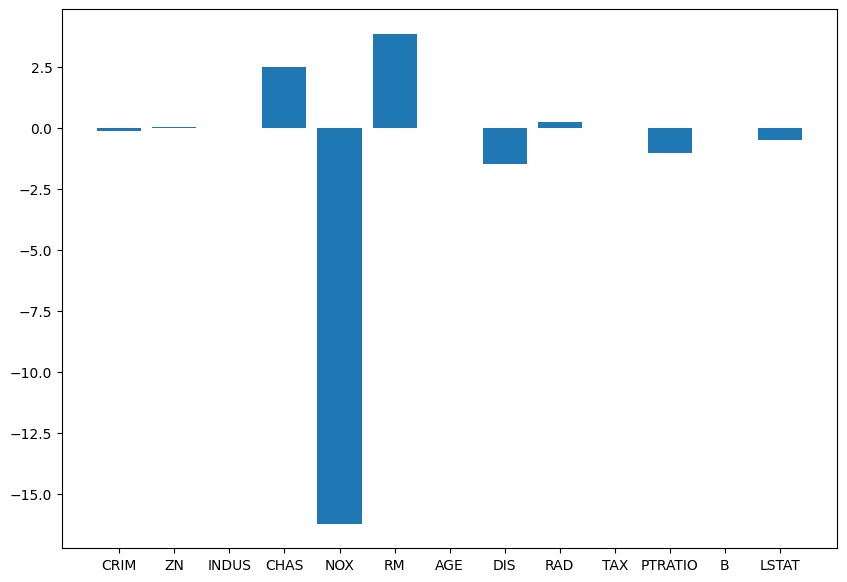

In [38]:
plt.figure(figsize=(10, 7)) #横：縦　＝１０：７
plt.bar(x=columns, height=model.coef_)

In [39]:
model.intercept_

37.93710774183255

In [40]:
#決定係数　０〜１　１に近いほどいい
print(f'train scode: {model.score(x_train, t_train)}')
print(f'test scode: {model.score(x_test, t_test)}')

train scode: 0.7645451026942549
test scode: 0.6733825506400184


In [43]:
#推論
y = model.predict(x_test)

In [48]:
print(f'予測値: {y[40]}')
print(f'目標値: {t_test[40]}')

予測値: 26.21043402689496
目標値: 23.9
